**# PROJECT - 503**

                                                        - Shaima Patel(V00949940)
                                                        - Sannath Reddy Vemula(V00949217)

**ABSTACT**

We are given 4 .csv files namely links.csv, movies.csv, tags.csv and genres.csv.
We have tried to pre process the files, visulaize interesting insights and apply some Data Mining Algorithms. 
We have create few models which are capable of predicting ratings parameter of a particular movie and also analyzed the users and ratings data to fetch similar users using Pearson Correlation coefficient in Recommender systems. As a part of text analysis, we implemented word cloud and also used tags.csv to see whether the tags assigned are relevant or not.

**INTRODUCTION**

We are provided movies data from 1920 to 2020 alonwith their ratings, genres and links.
We have worked on parameters: Tags, Ratings, Genres and Years

MovieLens Dataset contains following:
  MOVIES.csv
• MOVIEID: to represent the movie id
• TITLE : represent the ​full movie title and includes the year of release
• GENRE : a pipe-separated(|) list of genres associated with each movie

  LINKS.csv (contains URL parts and hence, cannot be used in our model)
• MOVIEID: again to represent the movie id
• IMDBID : link to the IMDb site.
• TMDBID : link to the The Movie DB site.

  RATINGS.csv
• USERID & MOVIEID: represent the user id and movie id
• RATING : uses a 5-star scale, with 0.5 star increments
• TIMESTAMP : use the epoch format

  TAGS.csv
• USERID & MOVIEID: represent the user id and movie id
• TAG : represent user-generated textual metadata
• TIMESTAMP : use the epoch format

  Dataset (After Modelling) contains following: 
• Extracted years from movie title.
• Converted timestamp which was in seconds from 1/1/1970 to readable date-time format.
• Genres of each movie are split by delimiter '|'.


In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import time
import numpy as np
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import sqlite3
%matplotlib inline

In [82]:
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

**DATA PRE-PROCESSING**

We started by cleaning the data so that we can get interesting insights from it.
We did 3 types of cleaning on our data.
1. Converting date-time format:
    The date and time were not in  data mining - ease readable format, and so we converted         into data mining friendly form
2. Extracting years from title:
    We had movie years besides title of movie which were not easy to use and so we                 separated them into individual column. 
3. Removed | from genres:
    We removed | so that genres can be used easily.

In [83]:
# data cleaning 

In [84]:
#timestamp of ratings and tags csv are in seconds (from 1/1/1970 UTC)

In [85]:
def time_stamp(dataframe):
    timestamp = []
    for seconds in dataframe['timestamp']:
        timestamp.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(seconds)))
    dataframe['timestamp'] = pd.to_datetime(timestamp)

In [86]:
#ratings csv
time_stamp(ratings)
time_stamp(tags)

**DATA VISUALIZATION**

**1. WORDCLOUD**

We initially visualized 3 wordclouds. 
First wordcloud was basically about the top-most genres over whole dataset. 
But we were interested in going into depth of wordclouds and hence we decided to see what words were used in a specific genres, So, our 2nd and 3rd wordcloud focuses on what words were more commom in Drama and Comedy. 

In [87]:
# Viz - 1 (Word clouds from tags.csv and movies.csv)

In [119]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_font_size=40, 
        scale=3,
).generate(str(data))

    fig = plt.figure(1, figsize=(10, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        #fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()
    

# show_wordcloud(genres)

In [120]:
popularTags = pd.merge(movies, tags, on='movieId', how='inner')
popularTags.timestamp = pd.to_datetime(popularTags.timestamp, infer_datetime_format=True)
popularTags.timestamp = popularTags.timestamp.dt.year
popularTags.sort_values(by='movieId', inplace=True)
print("Number of  Null values: ", max(popularTags.isnull().sum()))
popularTags.head()

Number of  Null values:  0


,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,2006
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,2006
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,2018
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,2018
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,2018


In [121]:
# convert to list
popularTags['genres'] = popularTags.genres.str.split('|')
# convert list of pd.Series then stack it
popularTags = (popularTags.set_index(['movieId','title','userId','tag','timestamp'])['genres'].apply(pd.Series).stack().reset_index().drop('level_5', axis=1).rename(columns={0:'genres'}))
popularTags.head()

,movieId,title,userId,tag,timestamp,genres
0,1,Toy Story (1995),336,pixar,2006,Adventure
1,1,Toy Story (1995),336,pixar,2006,Animation
2,1,Toy Story (1995),336,pixar,2006,Children
3,1,Toy Story (1995),336,pixar,2006,Comedy
4,1,Toy Story (1995),336,pixar,2006,Fantasy


In [122]:
D = popularTags[popularTags.genres == 'Drama']

In [123]:
Drama = []
Drama = D.tag.value_counts()[:20].index.tolist()
#print(Adventure)

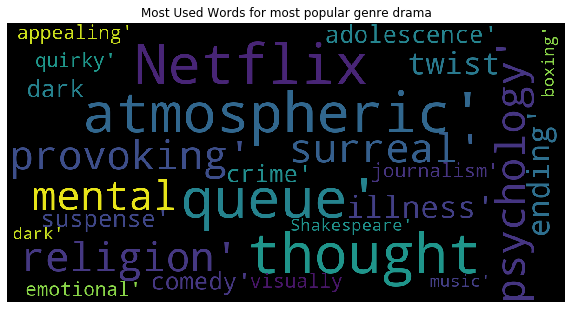

<Figure size 432x288 with 0 Axes>

In [126]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_font_size=40, scale=3,).generate(str(data))

    fig = plt.figure(1, figsize=(10, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=40)
        #fig.subplots_adjust(top=2.3)
    plt.title('Most Used Words for most popular genre drama')    
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(Drama)

In [127]:
C= popularTags[popularTags.genres == 'Comedy']

In [109]:
Comedy = []
Comedy = C.tag.value_counts()[:20].index.tolist()

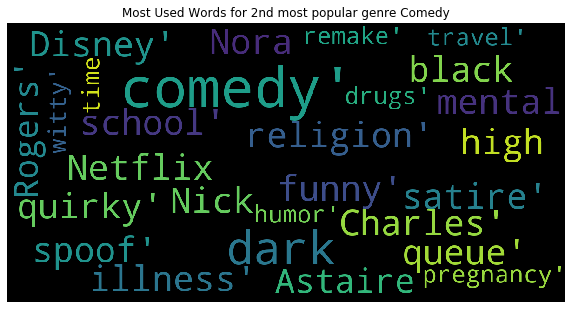

<Figure size 432x288 with 0 Axes>

In [130]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_font_size=40, 
        scale=3,
).generate(str(data))

    fig = plt.figure(1, figsize=(10, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=40)
        #fig.subplots_adjust(top=2.3)
    plt.title('Most Used Words for 2nd most popular genre Comedy')    
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(Comedy,)

**2. Movie Count over the decades**

We wanted to see the count of movie released over the decades and hence decided to plot a graph and a pie chart for the same purpose. Studying the data from 1920, we can see that count of movie released over the decades from 1920-2000 keeps on increasing which shows that people are getting more and more interested in movies. Although, in aughts decade (from 2000 to 2010 - #2814 movies) a sudden decrease was seen in movie released/decade.

In [23]:
# Viz - 2 (decade-wise movie count)

In [24]:
title = movies.title
tens = []
aughts = []
ninties = []
eighties = []
seventies = []
sixties = []
fifties = []
forties = [] 
thirties = []
twenties = []

In [25]:
for x in range(len(title)) :
    yr = title[x].split('(')[-1]
    year = yr[0:4]    
#    if title[x].find('(') != -1:      
    if year.isdigit():
        year_int = int(year)
        if year_int>2010 and year_int<2021 : 
            tens.append(year_int)
        elif year_int>2000 and year_int<2011 :
            aughts.append(year_int)
        elif year_int>1990 and year_int<2001 :
            ninties.append(year_int)
        elif year_int>1980 and year_int<1991 :
            eighties.append(year_int)
        elif year_int>1970 and year_int<1981 :
            seventies.append(year_int)
        elif year_int>1960 and year_int<1971 :
            sixties.append(year_int)
        elif year_int>1950 and year_int<1961 :
            fifties.append(year_int)
        elif year_int>1940 and year_int<1951 :
            forties.append(year_int)
        elif year_int>1930 and year_int<1941 :
            thirties.append(year_int)
        elif year_int>1920 and year_int<1931 :
            twenties.append(year_int)       

In [26]:
y_axis = [len(twenties),len(thirties),len(forties),len(fifties),len(sixties),len(seventies),len(eighties),
         len(ninties),len(aughts),len(tens)]
x_axis = []
for x in range(192,202) :
    x = x*10
    x_axis.append(x)

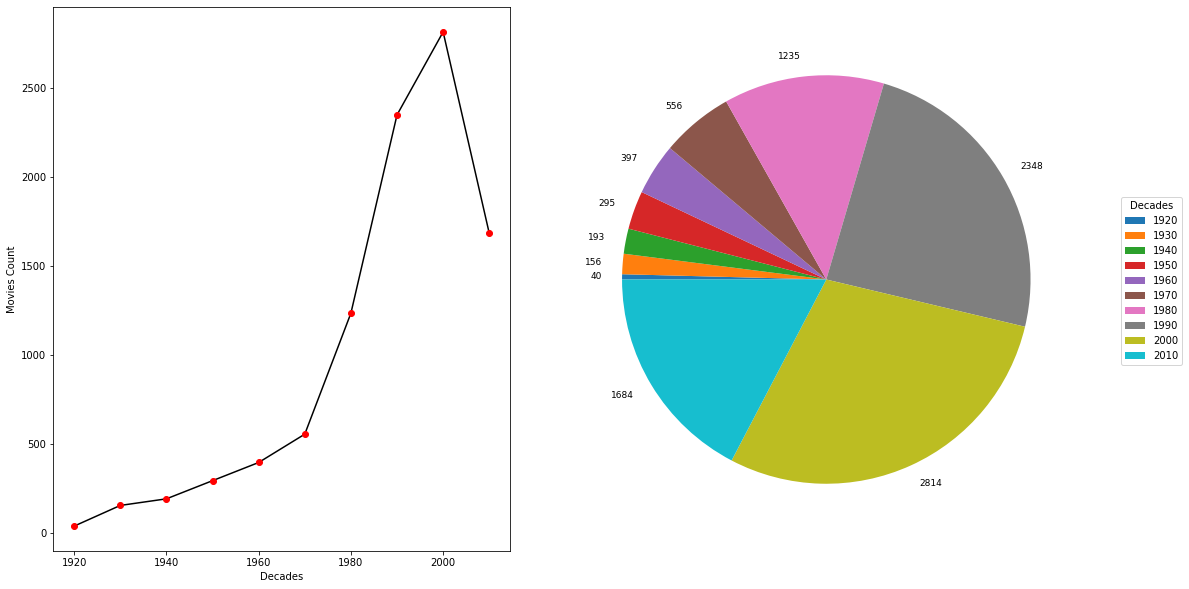

In [27]:
fig, axs = plt.subplots(1, 2)
# plt.plot(x_axis,y_axis,color='black')
# plt.plot(x_axis,y_axis,'o', color='red')
# plt.xlabel("Decades")
# plt.ylabel("Movies Count")
# plt.title("Number of movies per decade from 1920-2010")
# plt.show()

axs[0].plot(x_axis,y_axis,color='black')
axs[0].plot(x_axis,y_axis,'o', color='red')

axs[1].pie(y_axis,labels=y_axis,textprops={'fontsize': 9}, counterclock=False,startangle=180)
axs[1].axis('equal')

axs[1].legend(x_axis,title='Decades', bbox_to_anchor=(1,0.5),loc='right', bbox_transform=plt.gcf().transFigure)

fig.set_figheight(10)
fig.set_figwidth(18)

axs[0].set(xlabel='Decades', ylabel='Movies Count')
for ax in axs.flat:
    ax.label_outer()

**3. Movies released per year**

The below shown visualization displays the count of movies released per year. As the per decade count of movie showed us an interesting insight we decided to see the total movies released per year and so we plotted a line graph for the same purpose. The red dots in our graph shows movie released/year and from that we can conclude that highest movies were released around 2001 (i.e. approx 320)

In [28]:
# Viz - 3 (# movies released per year)

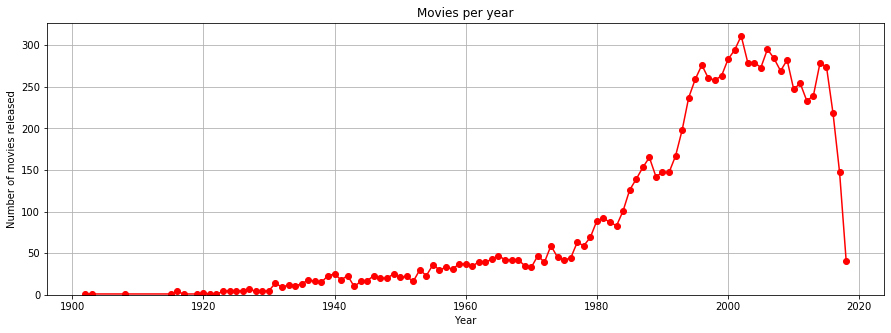

In [29]:
movies1 = pd.read_csv("movies.csv")
movies1.sort_values(by='movieId', inplace=True)
movies1.reset_index(inplace=True, drop=True)

movies1['year'] =  movies1.title.str.extract("\((\d{4})\)", expand=True)
movies1.year = pd.to_datetime(movies1.year, format='%Y')
movies1.year = movies1.year.dt.year
movies1.title = movies1.title.str[:-7]


movies1.dropna(inplace=True)
movies1.sort_values(by='movieId', inplace=True)
movies1.reset_index(inplace=True, drop=True)
 

combined_data = movies1[['movieId', 'year']].groupby('year')

fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(combined_data.year.first(), combined_data.movieId.nunique(), "r-o")
ax1.set_ylim(0,)
ax1.grid(None)


ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released');
plt.title('Movies per year')
plt.show()

**DATA MINING**

We have applied 3 different data mining algorithms on our dataset.
We have implemented Linear regression algorithm to predict the rating of a new movie and Pearson Coefficient from Recommender System for recommending a movie to a similar user by creating a similarity measure.

**Predicting the rating of a movie based on the genres**

So, we are taking list of all movies with same genres and calculating the average rating for all of them. This can be termed in an ease way as: RATING PARTICULAR GENRE. We started predicting subset of movie upto 6 genres using binomial coefficient (18C0 + 18C1 + _ _ + 18C6) which gave us total of 31,179 subset of genres out of 18 genres . This was quite cumbersome to plot on a single graph and so we decided to use subset of 3 genres (18c0 + 18c1 + 18c2 + 18c3). We got around 988 different movies. We also found some movies which were missing a subset of genres, Eg.(there are no movies with the genres like (drama, horror, sci-fi)). Due to this our list shrinked to 383 different subset of genres. This was good enough to plot a graph and hence we numbered each subset of genre from 0-987, where 0 represents 'no genres listed', 1 represents 'Adventure' and so on until we have all subsets of upto 3 genres (987 = (Adventure,Action,Thriller)). We found that movie with no genre listed had around 3.5 rating and this is how each genre will have individual ratings.So in the below drawn graph(fig-a) each point represent a genre with its average rating.

In [30]:
# plot -  : Rating Prediction

In [31]:
# extracting years out of movie titles
movies['year'] =  movies.title.str.extract("\((\d{4})\)", expand=True)

In [32]:
genres = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical',
                'Mystery','Romance','Sci-Fi','Thriller','War','Western']

In [33]:
import itertools
def findsubsets(S,m):
    return set((itertools.combinations(S, m)))


In [34]:
# movies with not more than 3 genres

In [35]:
temp = []
for k in range(0,4):
    temp.append(findsubsets(genres,k))

In [36]:
axis = []
for subset in temp:
    for comb in subset:
        temp = list(comb)
        temp.sort()
        axis.append(temp)
axis[0]=['(no genres listed)']

In [37]:
# axis
# type(axis[31179][0])

In [38]:
%%time

movies_per_genres = [None]*len(axis)

for i in range(len(axis)):   
    
    list_movies_in_genre = []
    
    for j in movies.index :
        
        m_genres = movies.genres[j].split('|')
        
        m_genres.sort()
        
        if axis[i] == m_genres:
            
            list_movies_in_genre.append(movies.movieId[j])
            
    movies_per_genres[i] = list_movies_in_genre                


Wall time: 3min 3s


In [39]:
#ratings

In [40]:
%%time

no_ratings   = []
rmid_list    = ratings.movieId.tolist()
genre_rating = [None]*len(axis)

for lst in movies_per_genres:
    
    ind = []
    r = 0
    avg_rating = 0
    
    if len(lst) > 0:
        
        mid_count = 0
        
        for mid in lst:
#             print(mid)
            try:
#                 ind = rmid.index(mid)
                ind = [i for i,val in enumerate(rmid_list) if val==mid]
                mid_count += len(ind)
            except:
                no_ratings.append(mid)
            
            for i in ind:
                r += ratings.rating[i]
        
        avg_rating = float(r/mid_count)
#         print(r, mid_count,avg_rating)
        
    genre_rating[movies_per_genres.index(lst)] = avg_rating

        
    

Wall time: 4min 50s


In [41]:
cnt = 0 
for i in movies_per_genres:
    if i == []:
        cnt += 1
        i = 0
print(cnt)
cnt = 0
for i in genre_rating:
    if i == None:
        cnt += 1
        i = 0
print(cnt)

606
605


In [42]:
# creation of dataframe of extracted values

In [43]:
linear_reg_table = pd.DataFrame(genre_rating,columns=['Ratings wrt Genre'])
# linear_reg_table = linear_reg_table.fillna('--No movies listed--')
linear_reg_table['Genres'] = axis
linear_reg_table = linear_reg_table.dropna(axis=0)
linear_reg_table.reset_index()

,index,Ratings wrt Genre,Genres
0,0,3.489362,[(no genres listed)]
1,1,3.313380,[Sci-Fi]
2,2,2.935484,[Action]
3,3,3.197888,[Comedy]
4,4,3.704545,[Fantasy]
5,5,3.650000,[Mystery]
6,6,3.658940,[Western]
7,7,2.500000,[Children]
8,8,3.426752,[Thriller]
9,9,3.523810,[Crime]


In [44]:
print(len(axis))
print(len(linear_reg_table))

988
383


In [45]:
#fig-a

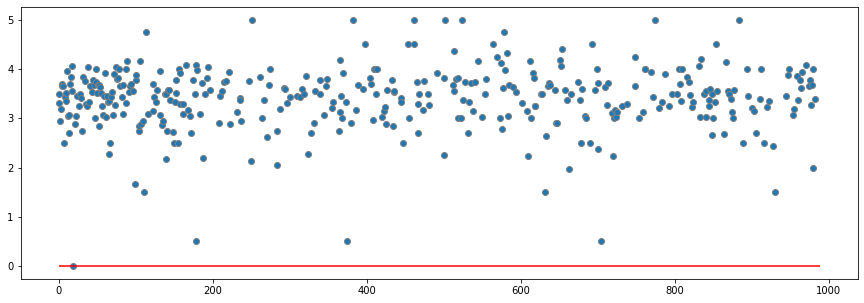

In [46]:
plt.figure(figsize = (15,5))
# plt.scatter(range(len(axis)),linear_reg_table['Ratings wrt Genre'])
# plt.scatter(range(len(axis)),genre_rating,edgecolors='grey')

plt.scatter(linear_reg_table.index,linear_reg_table['Ratings wrt Genre'],edgecolors='grey')
plt.hlines(y=0,xmin=0,xmax=988,colors='red',linestyles='solid')

**1. LINEAR REGRESSION**

We have plot a graph for linear regression in which X-axis has 0-987 different genres and Y-axis has average rating of each genre. It is used to find best fit line to know the rating of genre. We used seaborn plot for this purpose. We also used Scikit Library to split the dataset into train and test data to test the model we created. Also, mentioned values like error function, Y-intercept, slope and coefficient of determination.

In [47]:
# Linear Regression on plot - 1

In [48]:
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


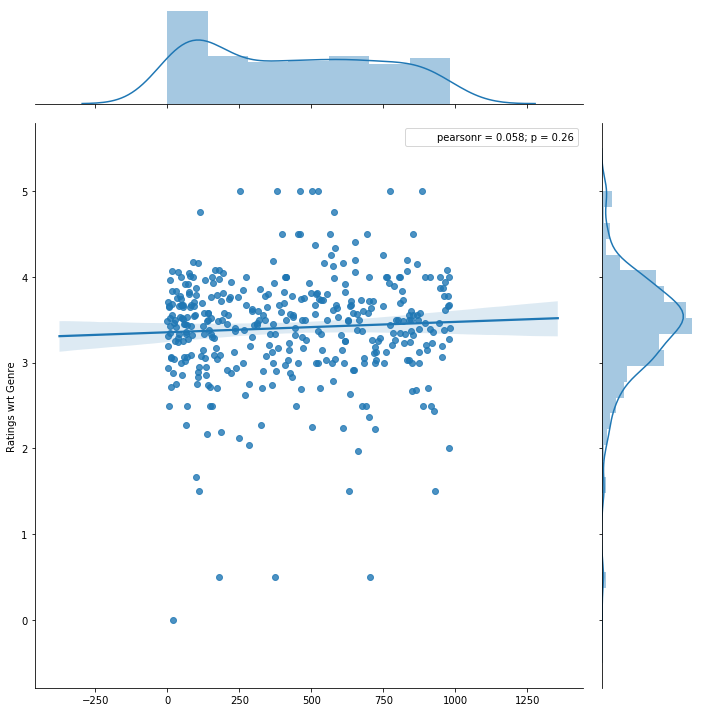

In [49]:
# sns.set(rc={'figure.figsize':(50,50)})
# j = sns.jointplot(x=range(len(axis)), y=linear_reg_table['Ratings wrt Genre'], data=linear_reg_table, kind='reg',height=10)
j = sns.jointplot(x=linear_reg_table.index, y=linear_reg_table['Ratings wrt Genre'], data=linear_reg_table, kind='reg',height=10)
j.annotate(stats.pearsonr)
plt.show()

In [50]:
# splitting dataset into train_test
# linear_reg_table.head(50)
# print(type((linear_reg_table.index.values)),len(linear_reg_table.index))
# print(type((linear_reg_table['Ratings wrt Genre'])),len(linear_reg_table['Ratings wrt Genre']))
# print(type(genre_rating), len(genre_rating))
# print(type(axis), len(axis))



In [51]:
# x_train, x_test, y_train, y_test = train_test_split(range(len(axis)), genre_rating, test_size=0.1, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(linear_reg_table.index.values, linear_reg_table['Ratings wrt Genre'].tolist(), test_size=0.1, random_state=42)
                                                                                                
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train(x = genres) - Predictors shape', x_train.shape)
print('Test(x = genres) - Predictors shape', x_test.shape)
print('Train(y = ratings) - Target shape', y_train.shape)
print('Test(y = ratings) - Target shape', y_test.shape)


Train(x = genres) - Predictors shape (344, 1)
Test(x = genres) - Predictors shape (39, 1)
Train(y = ratings) - Target shape (344, 1)
Test(y = ratings) - Target shape (39, 1)


In [52]:
# plotting linear regression for the dataset

In [53]:
cls = linear_model.LinearRegression() #line of best fit
#Fit method is used for fitting your training data into the model
cls.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Co-efficient of linear regression [[0.00012453]]
Intercept of linear regression model [3.34985935]
Mean Square Error 0.20472085766927825
Model R^2 Square value (Coefficient of determination) : 0.0029945422401715938


Text(0.5, 1.0, 'Linear Regression')

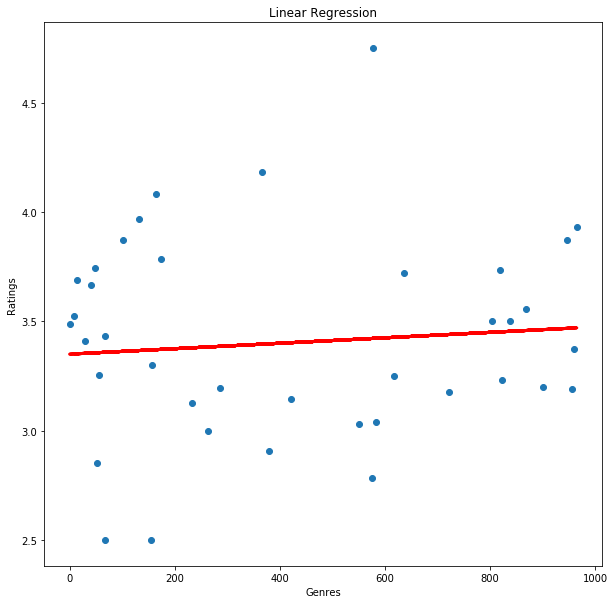

In [54]:
prediction = cls.predict(x_test)
#Parameters used for the model 
cls.get_params()
print('Co-efficient of linear regression',cls.coef_)
print('Intercept of linear regression model',cls.intercept_)
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))
print('Model R^2 Square value (Coefficient of determination) :', metrics.r2_score(y_test, prediction))
#Model Regression line on test set
plt.figure(figsize=(10,10))
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('Genres')
plt.ylabel('Ratings')
plt.title('Linear Regression')

**2. RECOMMENDER SYSTEM**

We have used Recommender System Algorithm to see which users have similar choice of watching same movies and rating them in a similar fashion. This algorithm can be used to recommend a movie to a similar type of user.
For the same purpose we have created a matrix (users * movies) of data frame having 610 rows × 761 columns and calculated the cosine function for users depending on how they have rate the same movie. We used Pearson Correlation which showed that the users with same taste in movies have cosine value = 0, those with similar taste have cosine value = 0 and those with a contrasting choice will have cosine value = 180  exhibiting that the users are opposite indirection. This function will be easy to judge what kind of users have same movie choice and one can use it to recommend movies to them.
Eg. if user 77 rates 2 movies as [1,5] , user 80 rates the same movie as [0.11,0.51] in a different rating scale then both have a same movie choice but at the same time, user 07 ratings for the same movie = [5,1], then they have a very different movie prefrences.
We have tried to show this in our dataset below using the recommender systems algorithm.

In [55]:
# plot - 2 : Recommending movies to similar user (Similarity measure) with 200 users and 10 movies

In [56]:
users = ratings['userId'].unique()
mov  = movies['movieId'].unique()

#matrix of (users*movies)
u_x_m = np.zeros((len(users),len(mov)))

#matrix to dataframe
df_u_x_m = pd.DataFrame(u_x_m, index=users, columns=mov)
# df_u_x_m.shape

In [57]:
%%time
#filling the matrix with ratings

for row in range(len(ratings)):
    user = ratings[row:(row+1)]['userId'][row]
    movie = ratings[row:(row+1)]['movieId'][row]
    rating = ratings[row:(row+1)]['rating'][row]
    df_u_x_m[movie][user] = rating

Wall time: 1min 24s


In [58]:
# Applying pearson correlation coefficient to get similar users

In [59]:
#considering smaller dataset with all users and 1000 movies
smaller_dataset = df_u_x_m[:]
smaller_dataset = pd.DataFrame(smaller_dataset,columns=[i for i in range(1001) if i in mov])
# smaller_dataset

In [60]:
total_ratings_row = smaller_dataset.astype(bool).sum(axis=1)
sum_ratings = smaller_dataset.sum(axis=1)
mean = total_ratings_row/sum_ratings
print(mean)

1      0.236715
2      0.285714
3      0.875000
4      0.276498
5      0.275000
6      0.286924
7      0.256098
8      0.279762
9      0.280000
10     0.312500
11     0.261905
12     0.234043
13     0.333333
14     0.294479
15     0.320000
16     0.270588
17     0.233645
18     0.273603
19     0.390658
20     0.247863
21     0.306383
22     0.229508
23     0.276243
24     0.260870
25     0.214286
26     0.308824
27     0.275591
28     0.334152
29     0.240000
30     0.216216
         ...   
581    0.206897
582    0.250000
583    0.271605
584    0.243402
585    0.226415
586    0.244681
587    0.245714
588    0.307692
589    0.241611
590    0.285041
591    0.272727
592    0.278932
593    0.287129
594    0.230241
595    0.217391
596    0.273973
597    0.275362
598    2.000000
599    0.392756
600    0.357405
601    0.217391
602    0.294760
603    0.274809
604    0.287356
605    0.309735
606    0.263463
607    0.257732
608    0.372955
609    0.308411
610    0.239216
Length: 610, dtype: floa

In [61]:
%%time

## mean matrix  for smaller  dataset (standardizing)

for header in smaller_dataset:
    for row in range(len(smaller_dataset[header])):
        if smaller_dataset[header][row+1] > 0:
            smaller_dataset[header][row+1] = smaller_dataset[header][row+1] - mean[row+1]


## mean matrix for entire dataset = df_mean_u_m (standardizing)

# df_mean_u_m = pd.DataFrame(u_x_m, index=users, columns=mov)

# for header in df_u_x_m:
#     for row in range(len(df_u_x_m[header])):
#         if df_u_x_m[header][row+1] > 0:
#             df_mean_u_m[header][row+1] = df_u_x_m[header][row+1] - mean[row+1]

smaller_dataset

Wall time: 7.74 s


,1,2,3,4,5,6,7,8,9,10,...,986,987,988,990,991,993,994,996,998,999
1,3.763285,0.000000,3.763285,0.000000,0.000000,3.763285,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,3.725000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,0.000000,3.713076,4.713076,2.713076,4.713076,3.713076,3.713076,2.713076,0.000000,2.713076,...,3.713076,0.0,0.000000,0.000000,3.713076,0.0,0.000000,3.713076,0.000000,1.713076
7,4.243902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,0.000000,3.720238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.720238,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [62]:
%%time

cosine = []                         # distance between similar_users
similar_users = []                  # users who have rated same movies

qq = 0

for row in range(1,(smaller_dataset.shape[0]+1)):     # to compare one row with other rows
    x = smaller_dataset[(row-1):row]
   
    l = []              # list which stores indices of elements in x which are non-zeros
    l1 = []             # list which stores indices of elements in x which are zeros
    
#     for i in range(1,(x.shape[1]+1)):
#         qq += 1
#         if x[i][row] != 0 :
#             l.append(i)
#         else : 
#             l1.append(i)
            
    for i in x.columns:
        if x[i][row] != 0 :
            l.append(i)
        else : 
            l1.append(i)
    
    if len(l1)<x.shape[1]:

        ind = (row+1)

        while ind < (smaller_dataset.shape[0]+1) :         # less than len(users)
            y = smaller_dataset[(ind-1):ind]    
            sim = 0
            #compare x vector with y vector - checking for similarity between 2 vectors
            c = 0       
            b = 0

            for j in l1:
                if y[j][ind] != 0 :
                    b += 1       # x and y are not similar
                if b>0 :
                    break

            if b == 0 :
                for k in l :
                    if y[k][ind] == 0 : 
                        c +=1    # x and y are not similar
                    if c>0:
                        break
                if c == 0 :         
                    similar_users.append((row,ind))
                    #similar users check by PEARSON Correlation
                    numerator = np.dot(x,y.T)
                    mod_x = np.linalg.norm(x)
                    mod_y = np.linalg.norm(y)
                    denominator = mod_x*mod_y
                    sim = numerator/denominator    
                    angle = math.acos(sim)
                    cosine.append(angle)
            ind += 1


Wall time: 10min 59s


In [63]:
#example of our algorithm 

In [64]:
similar_users,cosine

([(65, 258), (77, 459), (114, 582), (148, 154), (189, 300), (511, 581)],
 [0.11635516520687485, 0.0, 0.08476372911261786, 0.0, 0.0517354105729401, 0.0])

The above results of similar_users gives us 6 tuples which says that users in each tuple have watched same movies.
Cosine list gives the cosine value (pearson coefficient) and the results show that user with user id 77 and 459 have watched same movies and have similar rating pattern. This is also true for the users with userid's (148,154) and (511,581).
This concludes that these users have liked/disliked same movies and if at all one of the user in each tuple has to be recommended a movie, then it would be appropriate to recommend the movies watched by another similar user.

**3. TEXT MINING**

We have tried to implement the concept of Text Mining using the wordclouds which allows us to give a visual reprsentation of text data. The wordclouds are shown in the visualization section of our project. 
The wordclouds display the most popular genres and also within a specific genre the most famous words used. 
Our first Text Mining application shows the most popular genres people have prefered over the years.
The next two Wordcloud shows the most popular words in a specific genre namely, Comedy and Drama.

**CONCLUSION**

Hence, we have tried to clean the data, visulaize different insights and apply data mining algorithms that best fit our data.